In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap

In [3]:
# file = 'sample/20230101-20240210(2).nc'
file = 'sample/20240101-20240514.nc'
ds = xr.open_dataset(file)

In [4]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:    (longitude: 321, latitude: 161, level: 3, expver: 2, time: 1077)
Coordinates:
  * longitude  (longitude) float32 1kB 80.0 80.25 80.5 ... 159.5 159.8 160.0
  * latitude   (latitude) float32 644B 20.0 19.75 19.5 ... -19.5 -19.75 -20.0
  * level      (level) int32 12B 850 950 1000
  * expver     (expver) int32 8B 1 5
  * time       (time) datetime64[ns] 9kB 2024-01-01 ... 2024-05-14T12:00:00
Data variables:
    r          (time, expver, level, latitude, longitude) float32 1GB ...
    t          (time, expver, level, latitude, longitude) float32 1GB ...
    u          (time, expver, level, latitude, longitude) float32 1GB ...
    v          (time, expver, level, latitude, longitude) float32 1GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-19 12:19:55 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [5]:
times = ds['time'].values

In [6]:
date_search = '2024-04-06'
time = 0

for i in range(0, len(times)):
  if date_search in str(times[i]):
    time = i
    print(f"{i} - {str(times[i])}")
    break

768 - 2024-04-06T00:00:00.000000000


In [7]:
lat = ds['latitude']
lon = ds['longitude']
u = ds['u'][time][1][2]
v = ds['v'][time][1][2]
ws = np.sqrt(u**2 + v**2)

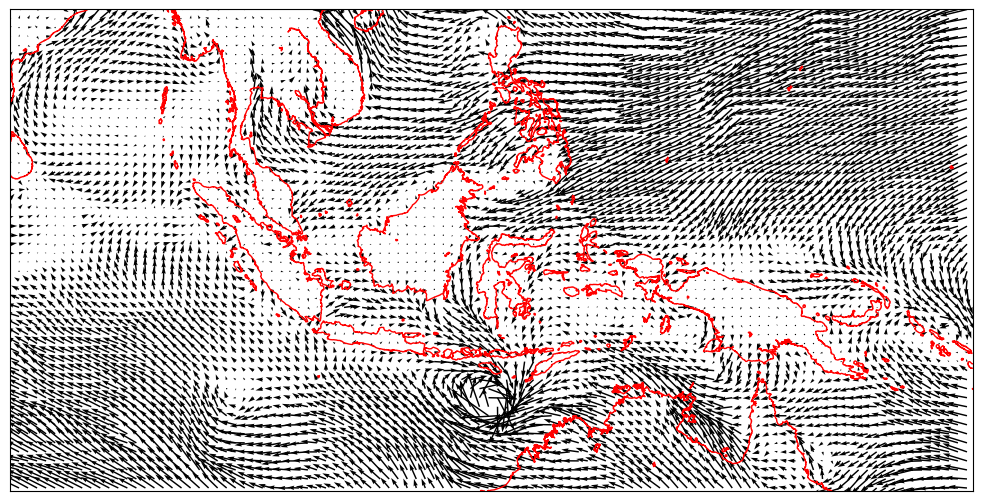

In [8]:
dpi = 100
zoom = 3
fig = plt.figure(figsize=(len(lon) * zoom / dpi, len(lat) * zoom / dpi))

m = Basemap(
    projection="cyl",
    llcrnrlon=lon[0].values,
    llcrnrlat=lat[-1].values,
    urcrnrlon=lon[-1].values,
    urcrnrlat=lat[0].values,
    resolution="i",
)
m.drawcoastlines(color="red")

# cf = plt.contourf(lon, lat, ws, cmap='jet')

skip = 3
q = m.quiver(
    lon[::skip],
    lat[::skip],
    u[::skip, ::skip],
    v[::skip, ::skip],
    scale_units="xy",
    scale=5,
    width=0.0015,
)

plt.tight_layout(pad=0)

fig.savefig(f"output/{date_search}.jpg", dpi=dpi)

plt.show()

In [45]:
x = 963/2
y = 483/2

lon = (x * 80 / 963) + 80
lat = 20 - (y * 40 / 483)

print(lon)
print(lat)

120.0
0.0
